<a href="https://colab.research.google.com/github/meichen-8/Bi183/blob/master/HW7_Meichen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW7 
Meichen Fang
## Problem 1
### (A) 
The MST is implemented in below.

In [0]:
def myMST(E,r):
    '''
    directed graph
    V = [0,1,...,len(E)-1]
    E is the weight matrix. Eij=[i,j,wij]
    r is the root index
    '''
    V=list(range(len(E)))
    U=[r]
    T=[]
    L=0
    while len(U)!=len(V):
        edges=[]
        for i in U:
            for e in E[i][:]:
                if e[1] not in U:
                    edges.append(e)
        if len(edges)==0:
            print('not a connected graph')
            break
        edges.sort(key=lambda x: x[2])
        T.append(edges[0])
        U.append(edges[0][1])
        L=L+edges[0][2]
    return T,L 

### (B)
Random graphs are generated:

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

def gen_G(n):
    E=[]
    for i in range(n):
        Ei=[]
        for j in range(n):
            if np.random.uniform(0, 1)>0.7:
                Ei.append((i,j,np.random.randint(1,20)))
        E.append(Ei)
    return E

Below are graphs(left) and corresponding minimum spanning tree(right) for two example graphs.

67


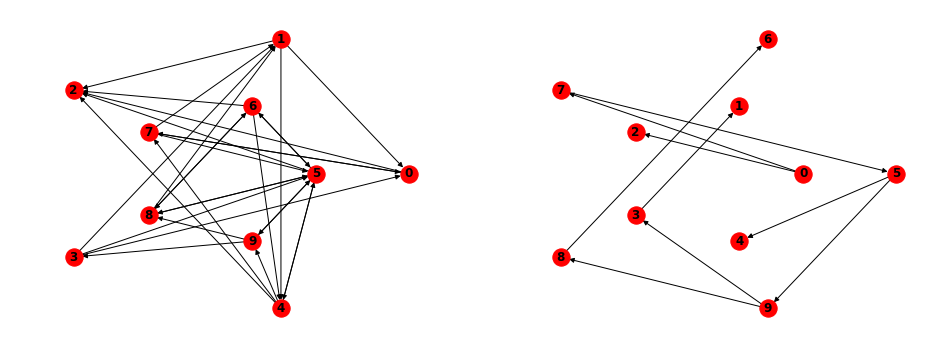

In [0]:
fig=plt.figure(figsize=(16,6))
E=gen_G(10)
G=nx.DiGraph()
for e in E:
    G.add_weighted_edges_from(e)
fig.add_subplot(121)
nx.draw_shell(G,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

T,L=myMST(E,0)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(122)
nx.draw_shell(GT,nlist=[range(5),range(5,10)], with_labels=True, font_weight='bold')

print(L)

79


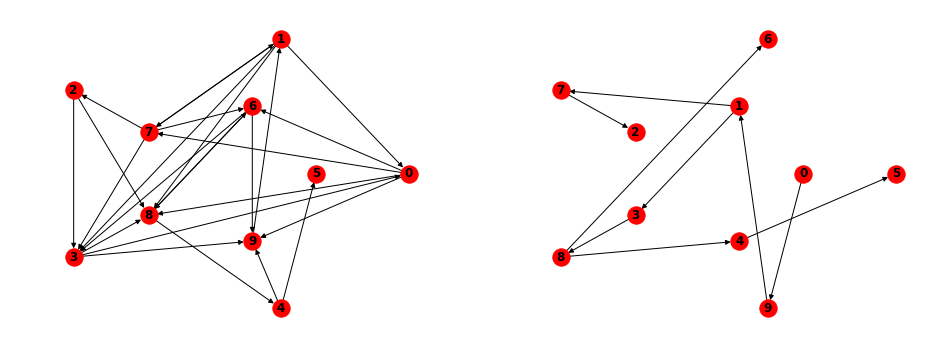

In [0]:
fig=plt.figure(figsize=(16,6))
E=gen_G(10)
G=nx.DiGraph()
for e in E:
    G.add_weighted_edges_from(e)
fig.add_subplot(121)
nx.draw_shell(G,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

T,L=myMST(E,0)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(122)
nx.draw_shell(GT,nlist=[range(5),range(5,10)], with_labels=True, font_weight='bold')

print(L)

### (C) 
Graphs that have more than one minimum spanning tree with same L exist and below is a example.

L of the first MST is 10
L of the second MST is 10


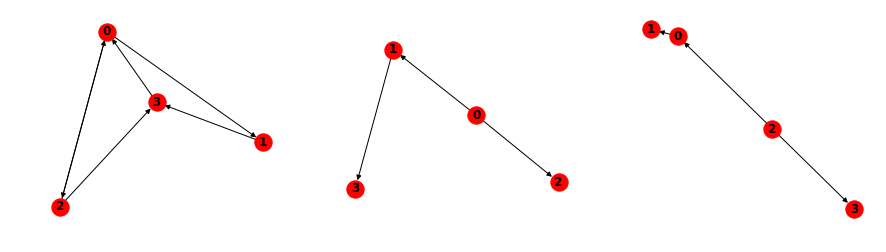

In [0]:
E=[[(0,1,3),(0,2,3)],[(1,3,4)],[(2,0,3),(2,3,4)],[(3,0,8)]]
fig=plt.figure(figsize=(15,4))
G=nx.DiGraph()
for e in E:
    G.add_weighted_edges_from(e)
fig.add_subplot(131)
nx.draw(G, pos=nx.spring_layout(G),with_labels=True, font_weight='bold')

T,L=myMST(E,0)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(132)
nx.draw(GT,pos=nx.spring_layout(GT),with_labels=True, font_weight='bold')
print('L of the first MST is',L)

T,L=myMST(E,2)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(133)
nx.draw(GT,pos=nx.spring_layout(GT),with_labels=True, font_weight='bold')
print('L of the second MST is',L)
plt.show()

### (D) 
My algorithm in part (A) is deterministic because the sort function in python is stable and it returns a single tree.

## Problem 2
### (A)

we can rewite delta function in this form and Srv indicates whether v belongs to the r group. 

$$
\delta(c_v,c_w)=\sum_r S_{rv}S_{rw}
$$

Therefore we can calculate Q by matrix and it takes $ O(n^2) $ in time becasue S is sparse. 

In [0]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def mylouvain(A):
    #A is np array
    m=np.sum(A)
    k=np.matrix(np.sum(A,axis=1))
    K=np.matmul(np.transpose(k),k)
    B=(A-K/m)/m #Q=B*delta
    #initialize
    n=len(A)
    S=np.eye(n)
    c=list(range(n))
    iterate=1
    end=0
    Q=[]
    while iterate:
        end=end+1
        iterate=0
        for i in range(n):
            ci0=c[i]
            S[ci0,i]=0
            q=np.matmul(S,B[:,i])
            ci=np.argmax(q)
            #update group
            if ci0!= ci:
                c[i]=ci
                S[ci,i]=1
                iterate=1
                Q.append(np.trace(np.matmul(np.matmul(S,B),S.transpose())))
            else:
                S[ci0,i]=1
        if end>100000:
            print('not converged after 100000 updates')
            break
    return c,Q

### (B)
Generating data:

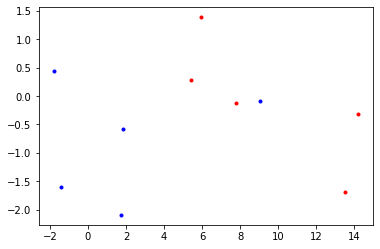

In [61]:
#generate data
n=5
data=np.zeros([2*n,2])
mean = [0, 0]
cov = [[10, 0], [0,1]]  # diagonal covariance
x1 = np.random.multivariate_normal(mean, cov, n)
plt.plot(x1[:,0], x1[:,1],'b.')

mean = [10, 0]
cov = [[10, 0], [0,1]]  # diagonal covariance
x2 = np.random.multivariate_normal(mean, cov, n)
plt.plot(x2[:,0], x2[:,1],'r.')
plt.show()

data[0:n,:]=x1
data[n:2*n,:]=x2


Generating kNN graph

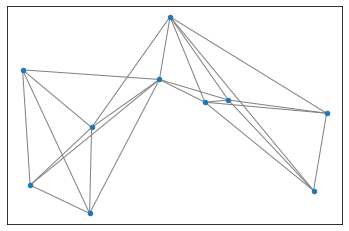

In [63]:
#construct a k nn graph
from scipy.spatial.distance import pdist,squareform
import networkx as nx
import seaborn as sns
k=4
v=pdist(data, 'euclidean')
D=squareform(v,'tomatrix')
A=np.zeros_like(D)
index=np.argsort(D, axis=1)
for i in range(len(A)):
    ni=index[i][1:(k+1)]
    A[i,ni]=1
    A[ni,i]=1

pos = { i : data[i] for i in range(len(data) ) }
G=nx.Graph()
G.add_edges_from(np.argwhere(A>0))
nx.draw_networkx(G,pos,node_size=20,edge_color='grey',with_labels=False)


Running my louvain algorithm:

number of community= 2


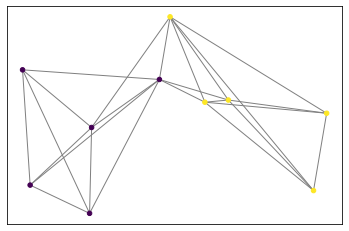

In [64]:
import time
from scipy.stats import rankdata

t=time.time()
c=mylouvain(A)
print('number of community=',len(set(c)))
color=rankdata(c)

nx.draw_networkx(G,pos,node_size=20,nodelist=list(range(len(c))),edge_color='grey',node_color=color,cmap=plt.get_cmap('viridis'),with_labels=False)
#print(time.time()-t,'s')

### (C)
Changing the space between the centroids (μ1 and μ2) from 10 to 5 and covariance as below:

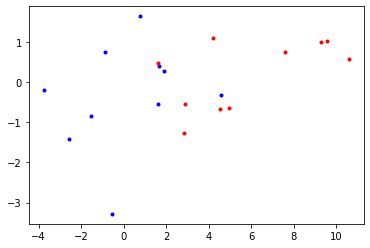

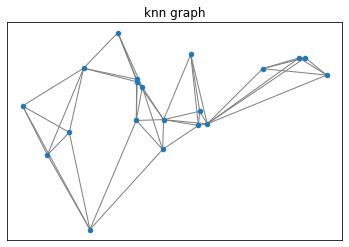

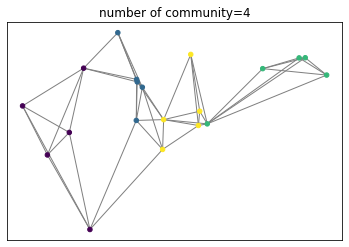

In [65]:
##### example 1
#generate data
n=10
data=np.zeros([2*n,2])
mean = [0, 0]
cov = [[10, 0], [0,1]]  # diagonal covariance
x1 = np.random.multivariate_normal(mean, cov, n)
plt.plot(x1[:,0], x1[:,1],'b.')

mean = [5, 0]
cov = [[10, 0], [0,1]]  # diagonal covariance
x2 = np.random.multivariate_normal(mean, cov, n)
plt.plot(x2[:,0], x2[:,1],'r.')
plt.show()

data[0:n,:]=x1
data[n:2*n,:]=x2

#construct a k nn graph
from scipy.spatial.distance import pdist,squareform
import networkx as nx
import seaborn as sns
k=4
v=pdist(data, 'euclidean')
D=squareform(v,'tomatrix')
A=np.zeros_like(D)
index=np.argsort(D, axis=1)
for i in range(len(A)):
    ni=index[i][1:(k+1)]
    A[i,ni]=1
    A[ni,i]=1

pos = { i : data[i] for i in range(len(data) ) }
G=nx.Graph()
G.add_edges_from(np.argwhere(A>0))
plt.figure()
plt.title('knn graph')
nx.draw_networkx(G,pos,node_size=20,edge_color='grey',with_labels=False)


import time
from scipy.stats import rankdata

t=time.time()
c=mylouvain(A)

color=rankdata(c)
plt.figure()
plt.title('number of community='+str(len(set(c))))
nx.draw_networkx(G,pos,node_size=20,nodelist=list(range(len(c))),edge_color='grey',node_color=color,cmap=plt.get_cmap('viridis'),with_labels=False)
#print(time.time()-t,'s')

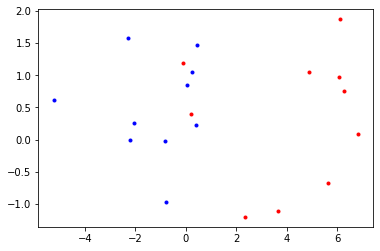

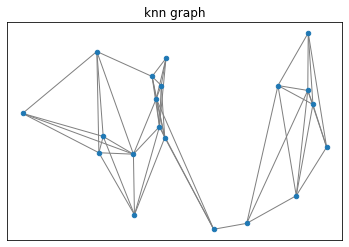

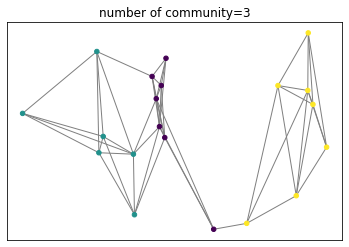

In [71]:
##### example 1
#generate data
n=10
data=np.zeros([2*n,2])
mean = [0, 0]
cov = [[6, 0], [0,1]]  # diagonal covariance
x1 = np.random.multivariate_normal(mean, cov, n)
plt.plot(x1[:,0], x1[:,1],'b.')

mean = [5, 0]
cov = [[6, 0], [0,1]]  # diagonal covariance
x2 = np.random.multivariate_normal(mean, cov, n)
plt.plot(x2[:,0], x2[:,1],'r.')
plt.show()

data[0:n,:]=x1
data[n:2*n,:]=x2

#construct a k nn graph
from scipy.spatial.distance import pdist,squareform
import networkx as nx
import seaborn as sns
k=4
v=pdist(data, 'euclidean')
D=squareform(v,'tomatrix')
A=np.zeros_like(D)
index=np.argsort(D, axis=1)
for i in range(len(A)):
    ni=index[i][1:(k+1)]
    A[i,ni]=1
    A[ni,i]=1

pos = { i : data[i] for i in range(len(data) ) }
G=nx.Graph()
G.add_edges_from(np.argwhere(A>0))
plt.figure()
plt.title('knn graph')
nx.draw_networkx(G,pos,node_size=20,edge_color='grey',with_labels=False)


import time
from scipy.stats import rankdata

t=time.time()
c=mylouvain(A)

color=rankdata(c)
plt.figure()
plt.title('number of community='+str(len(set(c))))
nx.draw_networkx(G,pos,node_size=20,nodelist=list(range(len(c))),edge_color='grey',node_color=color,cmap=plt.get_cmap('viridis'),with_labels=False)
#print(time.time()-t,'s')

As shown above, decreasing the distance between the centroids Louvain perform worse and the community number increases. Decreasing covariance leads to better performance.

### (D)


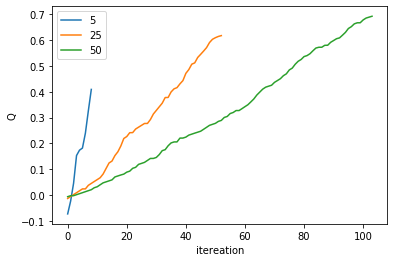

In [78]:
ax=plt.subplot(111)

for n in [5,25,50]:
    data=np.zeros([2*n,2])
    mean = [0, 0]
    cov = [[6, 0], [0,1]]  # diagonal covariance
    x1 = np.random.multivariate_normal(mean, cov, n)
    mean = [5, 0]
    cov = [[6, 0], [0,1]]  # diagonal covariance
    x2 = np.random.multivariate_normal(mean, cov, n)
    data[0:n,:]=x1
    data[n:2*n,:]=x2
    k=4
    v=pdist(data, 'euclidean')
    D=squareform(v,'tomatrix')
    A=np.zeros_like(D)
    index=np.argsort(D, axis=1)
    for i in range(len(A)):
        ni=index[i][1:(k+1)]
        A[i,ni]=1
        A[ni,i]=1
    pos = { i : data[i] for i in range(len(data) ) }
    G=nx.Graph()
    G.add_edges_from(np.argwhere(A>0))
    c,Q=mylouvain(A)
    ax.plot(Q,label=str(n))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)   
plt.ylabel('Q')
plt.xlabel('itereation')
plt.show()

## Problem 3
### (A) 
Here I treat cells as samples.

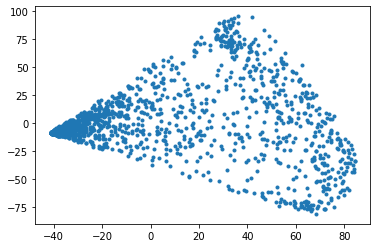

In [117]:
from sklearn.decomposition import PCA
data=np.loadtxt('./pbmc_data_matt.csv',delimiter=',')
data=np.matrix(np.log((1+data)))
pca = PCA(n_components=2)
x=pca.fit_transform(data)
pos = { i : x[i] for i in range(len(x) ) }
plt.plot(x[:,0],x[:,1],'.')

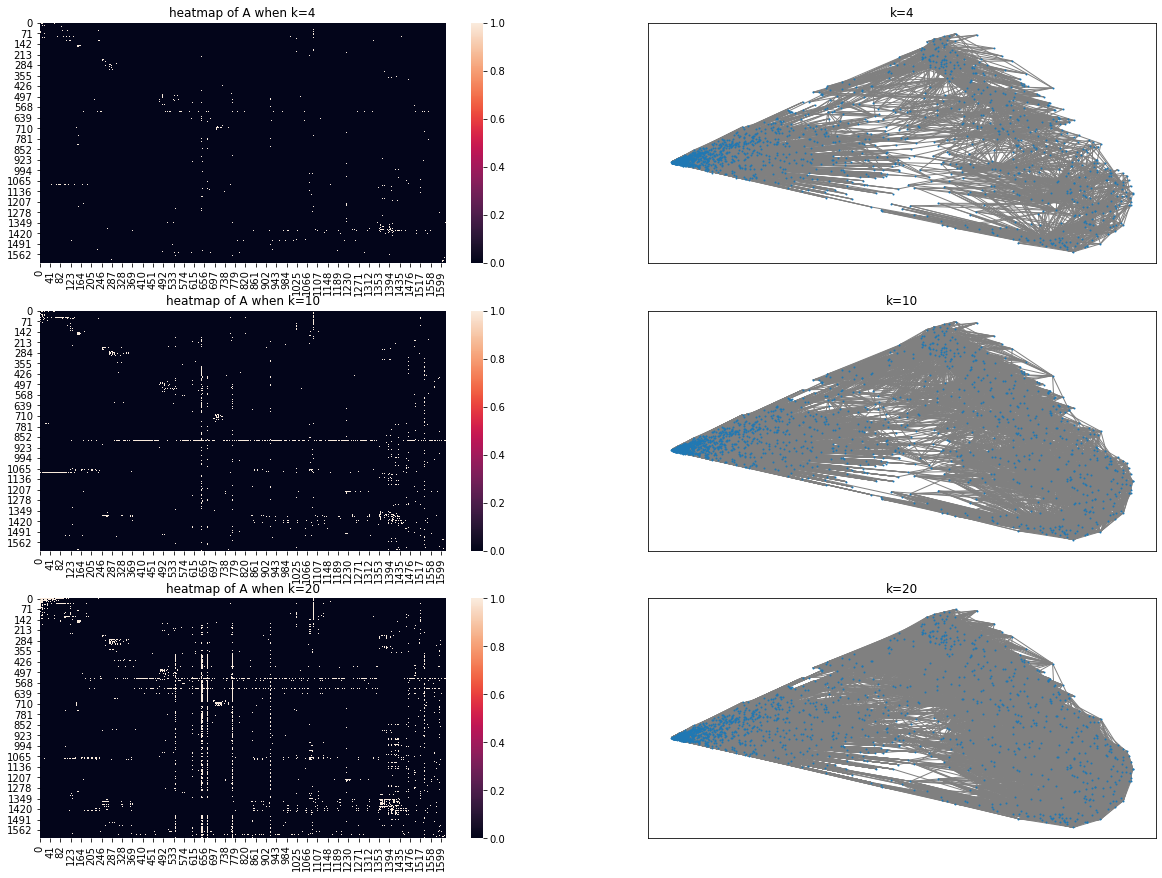

In [118]:
v=pdist(data, 'euclidean')
D=squareform(v,'tomatrix')
index=np.argsort(D, axis=1)
K=[4,10,20]
fig=plt.figure(figsize=(20,15))
for ik,k in enumerate(K):
    A=np.zeros_like(D)
    for i in range(len(A)):
        ni=index[i][1:(k+1)]
        A[i,ni]=1
        A[ni,i]=1
    fig.add_subplot(3,2,2*ik+1)
    sns.heatmap(A)
    plt.title('heatmap of A when k='+str(k))
    fig.add_subplot(3,2,2*ik+2)
    plt.title('k='+str(k))
    G=nx.Graph()
    G.add_edges_from(np.argwhere(A>0))
    nx.draw_networkx(G,pos,nodelist=list(range(len(x))),node_size=1,edge_color='grey',with_labels=False)

### (B)


In [95]:
def mylouvain(A):
    #A is np array
    m=np.sum(A)
    k=np.matrix(np.sum(A,axis=1))
    K=np.matmul(np.transpose(k),k)
    B=(A-K/m)/m #Q=B*delta
    #initialize
    n=len(A)
    S=np.eye(n)
    c=list(range(n))
    iterate=1
    end=0
    Q=[]
    while iterate:
        end=end+1
        iterate=0
        for i in range(n):
            ci0=c[i]
            S[ci0,i]=0
            q=np.matmul(S,B[:,i])
            ci=np.argmax(q)
            #update group
            if ci0!= ci:
                c[i]=ci
                S[ci,i]=1
                iterate=1
            else:
                S[ci0,i]=1
        if end>100000:
            print('not converged after 100000 updates')
            break
    return c
    
k=4
v=pdist(data, 'euclidean')
D=squareform(v,'tomatrix')
A=np.zeros_like(D)
index=np.argsort(D, axis=1)
for i in range(len(A)):
    ni=index[i][1:(k+1)]
    A[i,ni]=1
    A[ni,i]=1

pos = { i : data[i] for i in range(len(data) ) }
G=nx.Graph()
G.add_edges_from(np.argwhere(A>0))


import time

t=time.time()
c=mylouvain(A)

print(time.time()-t,'s')

11.504424571990967 s


### (C)

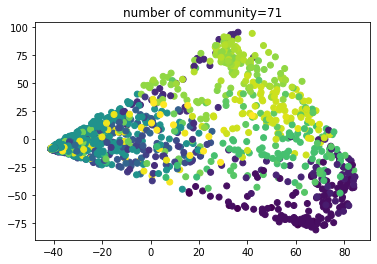

In [119]:
color=rankdata(c)
pca = PCA(n_components=3)
X=pca.fit_transform(data)
plt.figure()
plt.title('number of community='+str(len(set(c))))
plt.scatter(X[:,0],X[:,1],c=color,cmap=plt.get_cmap('viridis'))

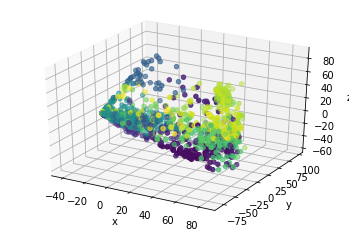

In [122]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=color,cmap=plt.get_cmap('viridis'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### (D)

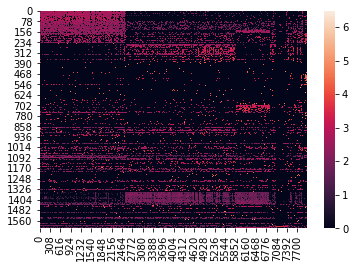

In [127]:
cells=np.concatenate((np.reshape(color/max(color)*6,(len(data),1)),data), axis=1)
sns.heatmap(cells)
plt.show()